In [1]:
import pandas as pd
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
scrapUrl = "https://www.idealista.com/venta-viviendas/barcelona-barcelona/pagina-{}.htm?ordenado-por=fecha-publicacion-desc"

## Let's Parse, baby

In [4]:
scrapUrl = "https://www.idealista.com/venta-viviendas/barcelona-barcelona/pagina-{}.htm"

def parseIdealista(n = 3):
    info = []
    habs = []
    m2 = []
    floor = []
    price = []
    for i in range(1, n + 1):
        print("Parsing page {}...".format(i))
        options = webdriver.ChromeOptions()
        #options.add_argument('headless');
        #options.add_argument('--profile-directory=Profile 1')
        #options.add_argument('--no-sandbox')
        #options.add_argument("--user-data-dir=C:/Users/omarl/AppData/Local/Google/Chrome/User Data/")
        #options.add_argument("--remote-debugging-port=45447")
        browser = webdriver.Chrome(executable_path=r"C:\Users\omarl\OneDrive\Escritorio\chromedriver.exe", options=options)
        browser.get(scrapUrl.format(i))
        time.sleep(10)
        page_source = browser.page_source
        browser.quit()
        soup = BeautifulSoup(page_source)
        for row in soup.select(".item-info-container"):
            try:
                info.append(row.select_one(".item-link").text)
                habs.append(row.select(".item-detail")[0].text)
                m2.append(row.select(".item-detail")[1].text)
                floor.append(row.select(".item-detail")[2].text)
            except:
                floor.append("No info")
            try:
                price.append(row.select(".item-price")[0].text)
            except:
                price.append("No info")
                
            
    data = {
        "info": info,
        "habs": habs,
        "m2" : m2,
        "floor" : floor,
        "price" : price
    }
    return data


In [5]:
data = parseIdealista()

Parsing page 1...
Parsing page 2...
Parsing page 3...


In [6]:
df = pd.DataFrame(data = data)

In [7]:
df["habs"] = df["habs"].str.extract(r"(\d+)")
df["habs"] = pd.to_numeric(df["habs"])
df["m2"] = df["m2"].str.extract(r"(\d+)")
df["m2"] = pd.to_numeric(df["m2"])

In [8]:
df["elevator"] = df["floor"].str.match(r".*con ascensor.*")
df["exterior"] = df["floor"].str.match(r".*planta exterior.*")
df["floor"] = df["floor"].str.extract(r"(\d+)")
df["floor"] = pd.to_numeric(df["floor"])
df["neigh"] = df["info"].str.split(',').str[-2]
df["neigh"] = df["neigh"].str.replace(r"[A-zÀ-ú]+ en ", "")
df["neigh"] = df["neigh"].str.replace(r"^\s*", "")
df["neigh"] = df["neigh"].str.replace(r"[A-zÀ-ú]+ en ", "")
df["neigh"] = df["neigh"].str.replace(r"Casa o chalet ", "")
df["neigh"] = df["neigh"].str.replace(r"Chalet " , "")
df["price"] = df["price"].str.replace(r"[€\.]", "")
df["price"] = pd.to_numeric(df["price"])

In [9]:
df["type"] = df["info"].str.split(" ").str[0]

In [10]:
top10Index = df.groupby("neigh")["price"].mean().sort_values(ascending = False).head(10).index
top10obs = df.groupby("neigh")["neigh"].count().sort_values(ascending = False).head(10)

<AxesSubplot:xlabel='price', ylabel='neigh'>

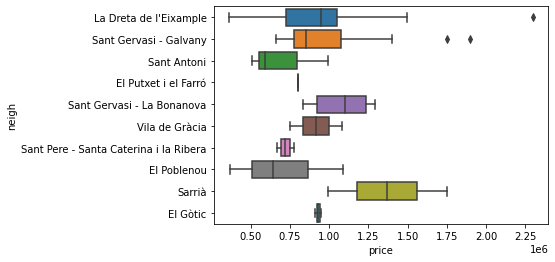

In [11]:
sns.boxplot(y="neigh", x="price", data=df[df["neigh"].isin(top10Index)])

In [12]:
top_bot = df.groupby("neigh")["price"].mean().sort_values(ascending = False).head(10)
top_bot = top_bot.append(df.groupby("neigh")["price"].mean().sort_values(ascending = False).tail(10))
top_bot = top_bot.to_frame().reset_index()
top_bot["price"] = top_bot["price"]

In [13]:
top_bot

,neigh,price
0,Sarrià,1.370000e+06
1,Sant Gervasi - La Bonanova,1.075714e+06
2,Sant Gervasi - Galvany,1.014143e+06
3,La Dreta de l'Eixample,9.823333e+05
4,El Gòtic,9.300000e+05
5,Vila de Gràcia,9.150000e+05
6,El Putxet i el Farró,8.000000e+05
7,Sant Pere - Santa Caterina i la Ribera,7.200000e+05
8,El Poblenou,7.000000e+05
9,Sant Antoni,6.983333e+05
